numba
===

The [numba](https://numba.pydata.org/) package offers an alternate way to speed up your python code by simply adding decorators ([example1](https://pythonbasics.org/decorators/), [example2](https://realpython.com/primer-on-python-decorators/)) to your functions.  

The code below uses:
* [numba](https://numba.pydata.org/)
  * [interactive demo notebooks](https://mybinder.org/v2/gh/numba/numba-examples/master?filepath=notebooks)
* [ctypes](https://docs.python.org/3/library/ctypes.html)
* [numpy](https://numpy.org/)
* [Pillow](https://pypi.org/project/Pillow/)

This directory contains a Python module numbalib.py which is virtual the same as mypylib, except that the functions are wrapped using numba to compile the Python code.  Look over the code before you begin.

In [1]:
import numbalib
import mypylib
import numpy as np

Estimating pi using uniform random numbers
-----

We'll first measure the time of Python code with our findPi function.  We use 100M random numbers thrown in a unit square to estimate the value of pi.

In [2]:
%time PI=mypylib.findPi(100*1000*1000)
print("Estimate for pi:",PI)

CPU times: user 14.6 s, sys: 0 ns, total: 14.6 s
Wall time: 15 s
Estimate for pi: 3.14173588


Now compare using the version with numba.

In [3]:
%time PI=numbalib.findPi(100*1000*1000)
print("Estimate for pi:",PI)

CPU times: user 1.19 s, sys: 82.4 ms, total: 1.27 s
Wall time: 2.72 s
Estimate for pi: 3.14161828


Example 2: Visualizing the Mandelbrot Set
---

We'll begin with a pure python example to draw the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set).

The Python interface is:

def mandel(img, re1, re2, im1, im2, nr, ni, NTRIALS=255)<br>
* img = image array[npX][npY]
* re1, re2 = range to explore on real axis
* im1, im2 = range to explore in imaginary axis
* nr, ni = number of divisions in re/im ranges
* NTRIALS = numebr of iterrations to easimate if a point is included in the set

In [4]:
import numpy as np
# define parameters for the calulation
npX=2000   # 2000 x 2000 pixel image
npY=2000
nTrials=255
re1=-2.1
re2=0.6
im1=-1.5
im2=1.5
img=np.ndarray(shape=(npX,npY), dtype=np.double) # array to hold our image

In [5]:
%time mypylib.mandel(img,re1,re2,im1,im2,npX,npY,nTrials) # this will take a moment....

CPU times: user 40.6 s, sys: 4.9 ms, total: 40.6 s
Wall time: 41.7 s


Next, let's make a nice picture.  I'll leave it as an optional exercise if you want to add color.

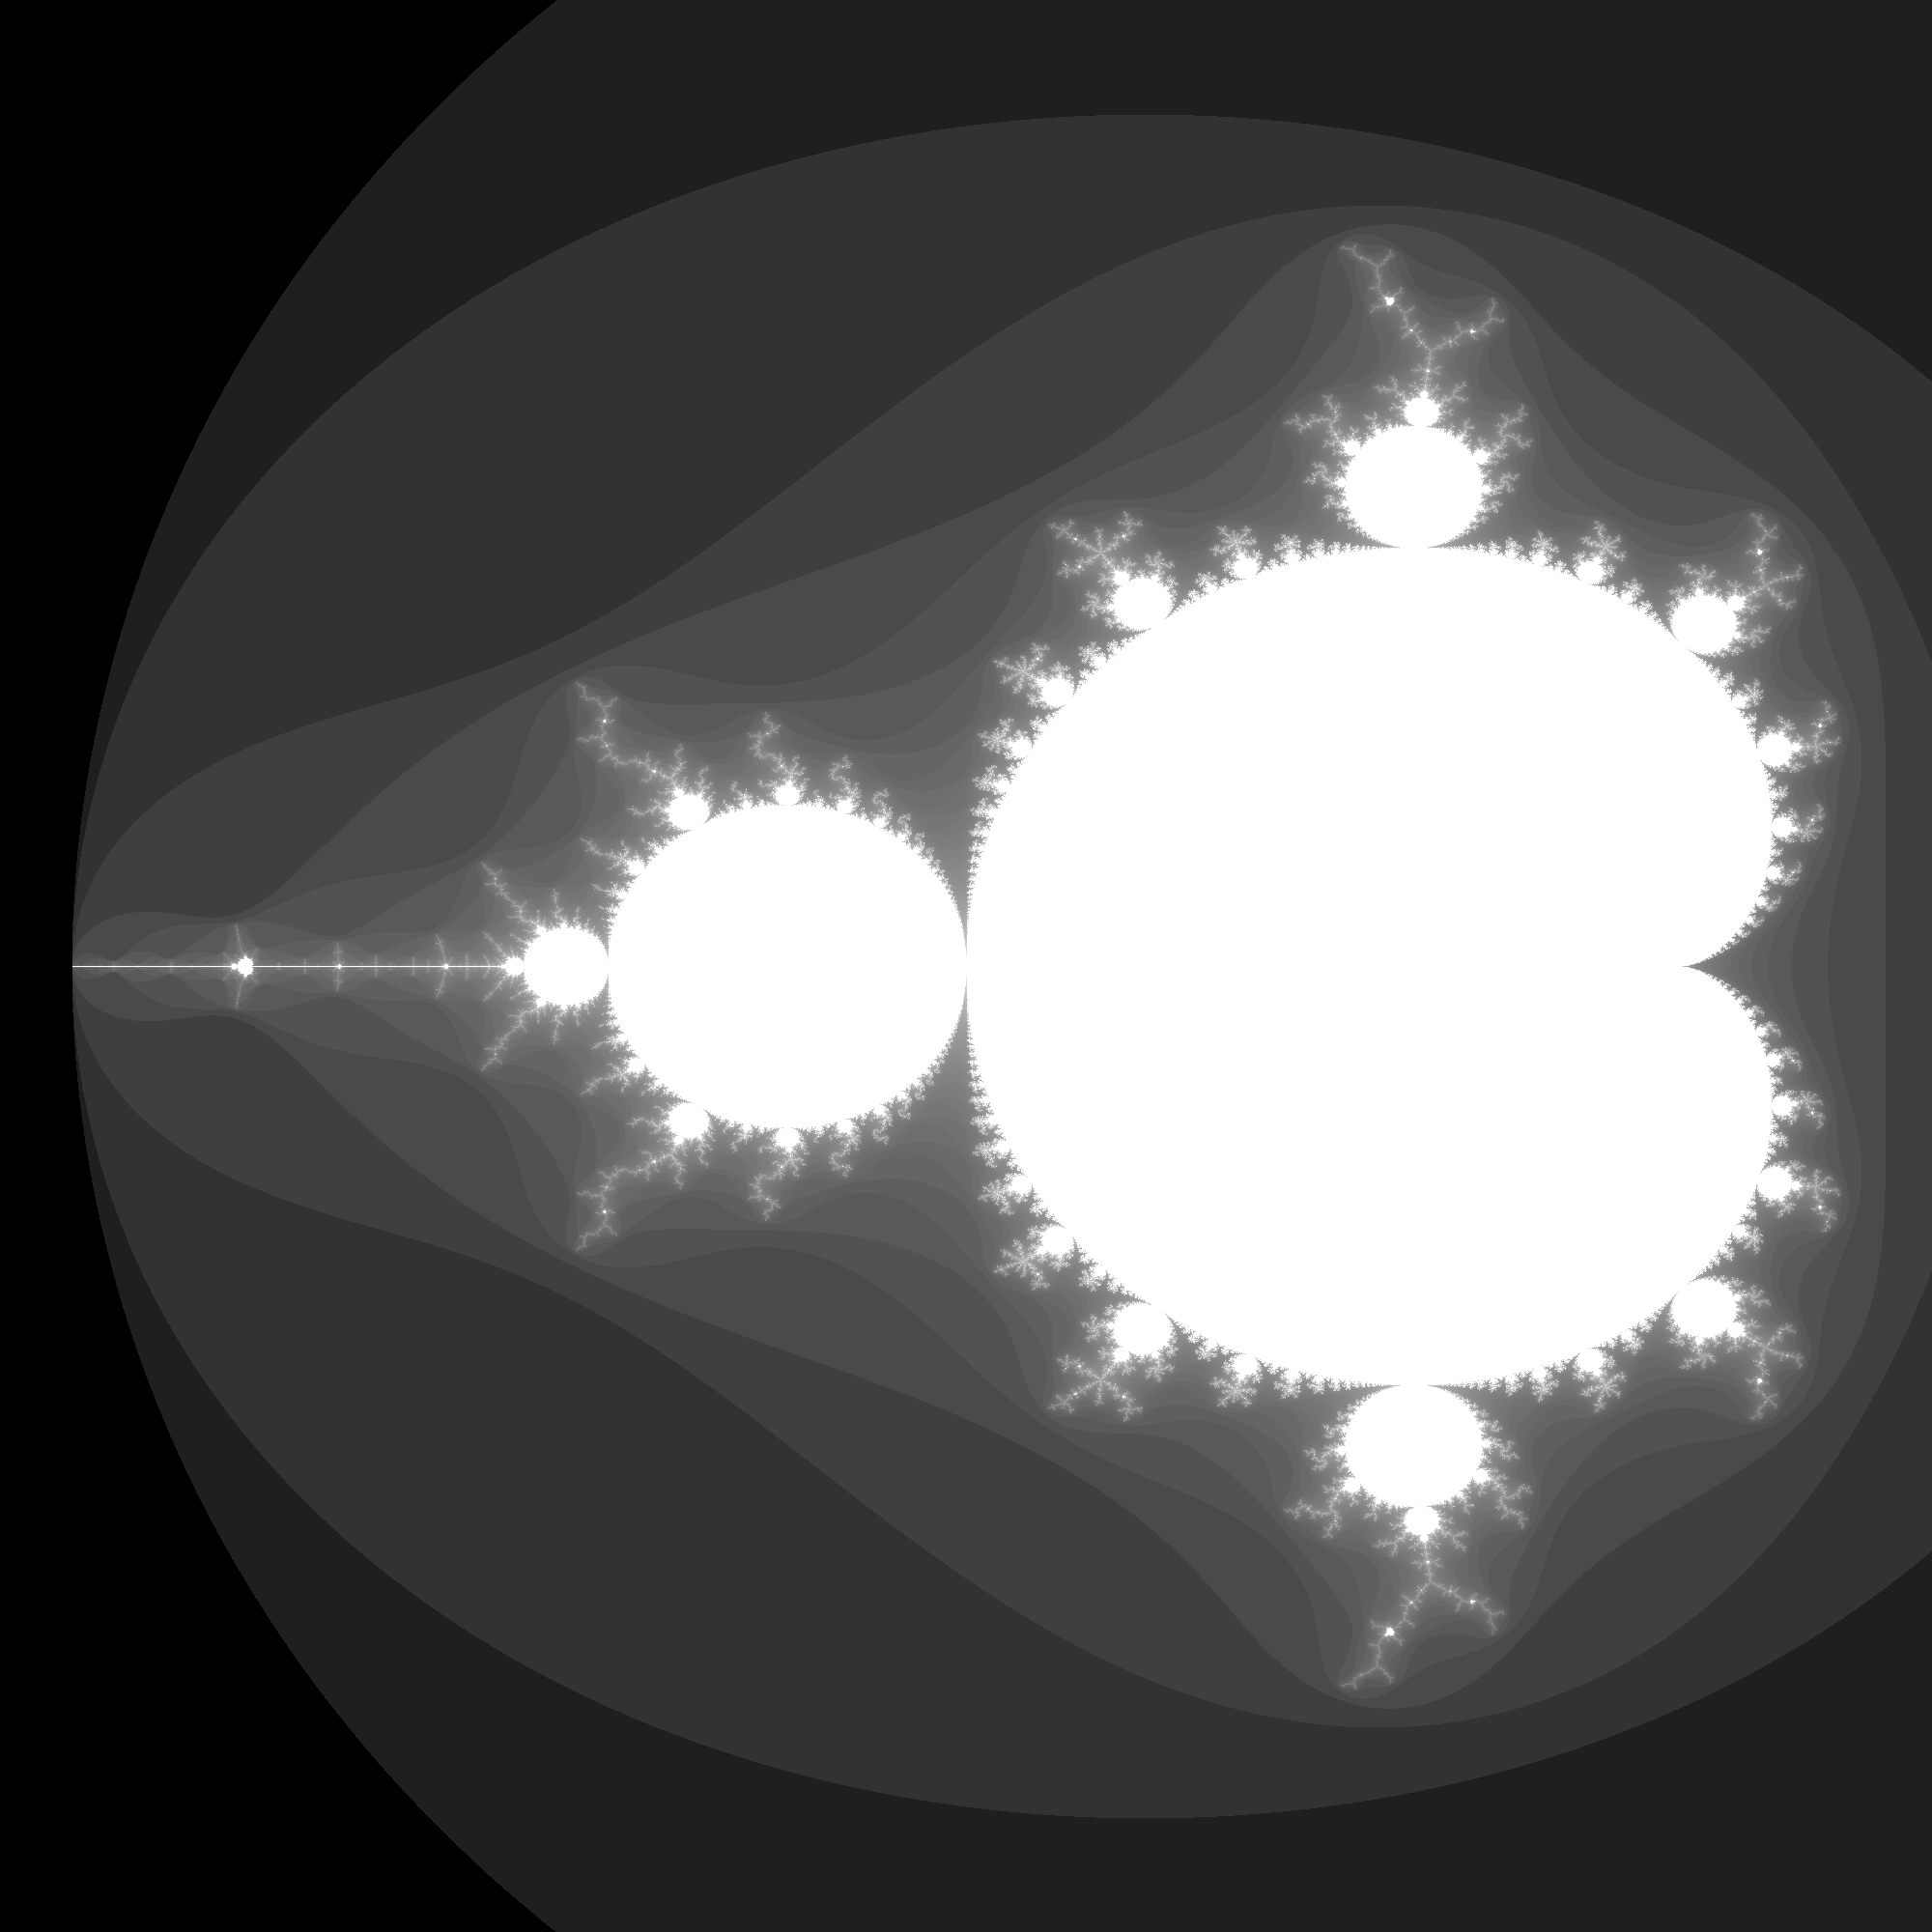

In [6]:
from PIL import Image

# convert values to 0 - 255 int8 format
img=np.log(img)
img = (img/img.max()*255).astype('uint8')
image = Image.fromarray(img)

display(image)

Now repeat using the library with numba

In [7]:
%time numbalib.mandel(img,re1,re2,im1,im2,npX,npY,nTrials) # this will be fast....

CPU times: user 979 ms, sys: 16.9 ms, total: 996 ms
Wall time: 1.02 s


Homework project
=================

Project 1
---------
Examine the Python code below.  And create a version using numba jit compilation.  Then produce a plot showing the ratio of the time required to perform the calculation in the two cases (Python/Python+numba) versus the input number *n*.  Extend your plot to at least n=2500.

In [10]:
def count3d(n):
    count=0
    for i in range (n):
        for j in range (i+1,n):
            for k in range (j+1,n):
                count = count +1
    return count

Below we use the [timeit module](https://docs.python.org/3/library/timeit.html) instead of the cell magick %time.  This allow us to retrieve the time in a Python variable.
Note: computer timers have limited accuracy, therefore you may observe large fractional fluctuations for small times.  The estimate can be improved by averaging over several calls to the code.  Be aware of this, but you don't need to be very accurate in measuring the small times for this project, the case for large *n* is the most interesting region!

In the example below timeit executes the count3d function with n=10.  In this examples the calculation is repeated number=1 times in a trial.  By default 5 trials are run and the best time is reported.  See the timeit documentation for more information.

In [11]:
#%time count3d(ncount)

ncount=10
import timeit
execTime=timeit.timeit(f'count3d({ncount})', number=1, globals=globals())
print(f'execution time = {execTime} seconds')

execution time = 8.55599864735268e-06 seconds


n= 100  Python=0.00495s  Numba=0.00001s  Speedup=844.34x
n= 226  Python=0.05291s  Numba=0.00001s  Speedup=5270.25x
n= 352  Python=0.22363s  Numba=0.00002s  Speedup=12515.22x
n= 478  Python=0.59481s  Numba=0.00003s  Speedup=20032.34x
n= 605  Python=1.22742s  Numba=0.00004s  Speedup=29418.05x
n= 731  Python=2.19064s  Numba=0.00006s  Speedup=39636.39x
n= 857  Python=3.51201s  Numba=0.00007s  Speedup=48759.28x
n= 984  Python=5.23388s  Numba=0.00011s  Speedup=49734.34x
n=1110  Python=7.65730s  Numba=0.00012s  Speedup=66148.79x
n=1236  Python=10.43023s  Numba=0.00014s  Speedup=75978.99x
n=1363  Python=14.14454s  Numba=0.00017s  Speedup=80888.27x
n=1489  Python=18.13011s  Numba=0.00020s  Speedup=92879.42x
n=1615  Python=23.81040s  Numba=0.00022s  Speedup=110680.61x
n=1742  Python=29.30887s  Numba=0.00026s  Speedup=113678.39x
n=1868  Python=38.01376s  Numba=0.00030s  Speedup=128101.06x
n=1994  Python=47.47523s  Numba=0.00031s  Speedup=150914.77x
n=2121  Python=58.49744s  Numba=0.00037s  Speedu

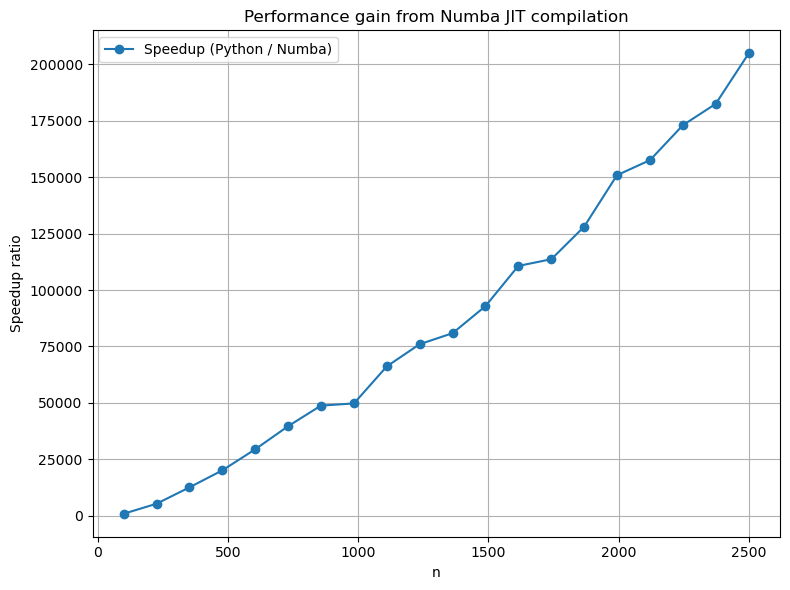

In [8]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

#Original Python function 
def count3d(n):
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                count += 1
    return count

#Numba version
@njit
def count3d_numba(n):
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                count += 1
    return count

# Warm up numba
count3d_numba(10)

#Measure execution times
n_values = np.linspace(100, 2500, 20, dtype=int)
t_python = []
t_numba = []

for n in n_values:
    t1 = timeit.timeit(lambda: count3d(n), number=1)
    t2 = timeit.timeit(lambda: count3d_numba(n), number=1)
    t_python.append(t1)
    t_numba.append(t2)
    print(f"n={n:4d}  Python={t1:.5f}s  Numba={t2:.5f}s  Speedup={t1/t2:.2f}x")

#Compute ratio
speedup = np.array(t_python) / np.array(t_numba)

#Plot
plt.figure(figsize=(8,6))
plt.plot(n_values, speedup, 'o-', label='Speedup (Python / Numba)')
plt.xlabel("n")
plt.ylabel("Speedup ratio")
plt.title("Performance gain from Numba JIT compilation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
